In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers_df = pd.read_csv('data/Mall_Customers.csv',header=0,
                           names=['ClienteID','Gênero','Idade','Renda anual (k $)','Pontuação de gastos (1-100)'])
print(customers_df.shape)
customers_df.head()

(200, 5)


,ClienteID,Gênero,Idade,Renda anual (k $),Pontuação de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Análise Exploratória

In [3]:
cols = customers_df.columns
cols

Index(['ClienteID', 'Gênero', 'Idade', 'Renda anual (k $)',
       'Pontuação de gastos (1-100)'],
      dtype='object')

In [4]:
# Remover coluna 
del customers_df['ClienteID']

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gênero                       200 non-null    object
 1   Idade                        200 non-null    int64 
 2   Renda anual (k $)            200 non-null    int64 
 3   Pontuação de gastos (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Renda anual (k $),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Pontuação de gastos (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


## Verificara a quantidade clientes por gênero

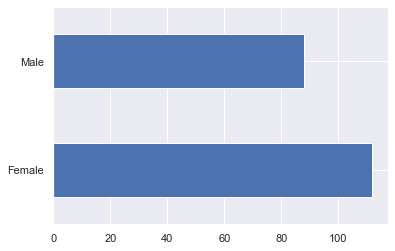

In [7]:
custo_genero = customers_df['Gênero'].value_counts()
custo_genero.plot(kind='barh')
plt.show()

## Verificara as distribuções das variáveis numéricas

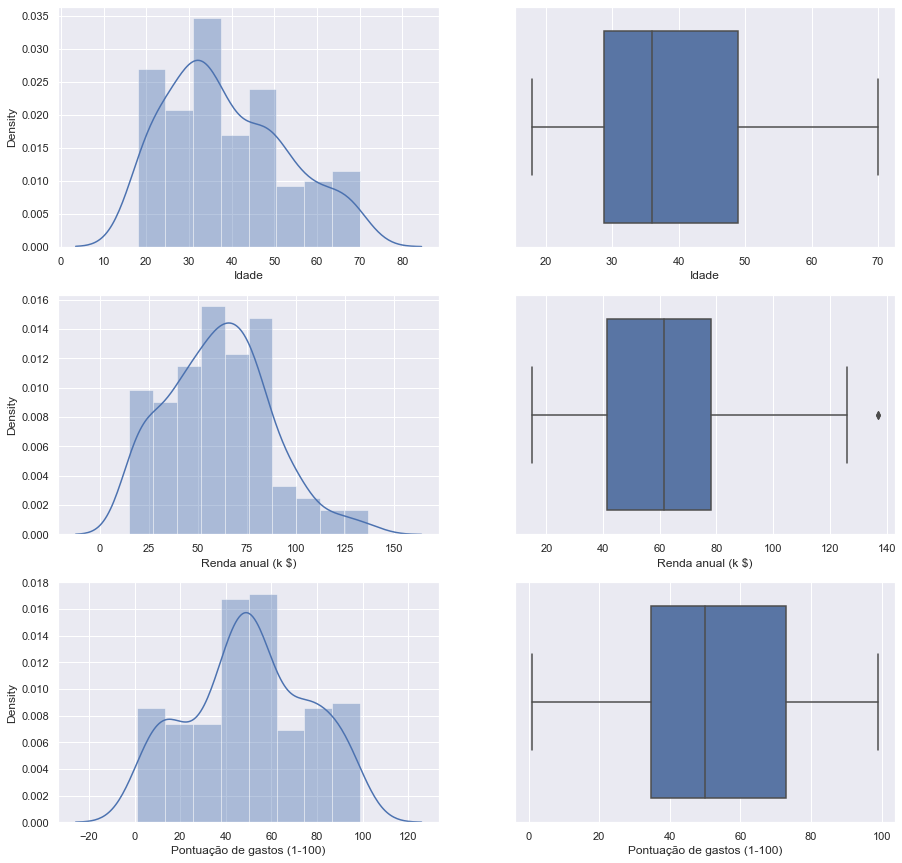

In [8]:
num_cols = ['Idade', 'Renda anual (k $)','Pontuação de gastos (1-100)']
n_rows = len(num_cols)

i = 1
plt.figure(figsize=(15,15))
for col in num_cols:
    plt.subplot(n_rows,2,i)
    sns.distplot(customers_df[col])

    plt.subplot(n_rows,2,i+1)
    sns.boxplot(customers_df[col])
    i = i+2
plt.show()

## Verificar a distribuição de idade por gênero

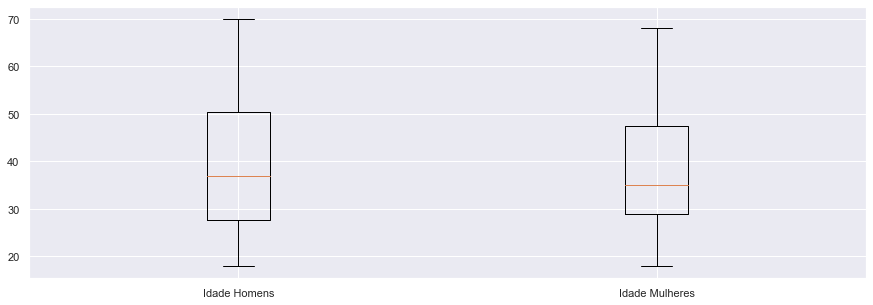

In [9]:
plt.figure(figsize=(15,5))
age_by_Male = customers_df[customers_df['Gênero'] == 'Male']['Idade']
age_by_Female = customers_df[customers_df['Gênero'] == 'Female']['Idade']

dist = [age_by_Male, age_by_Female]
plt.boxplot(dist)
plt.xticks([1,2],['Idade Homens', 'Idade Mulheres'])
plt.show()

## Verificar se existe alguma segmenção aparente em relação ao gênero

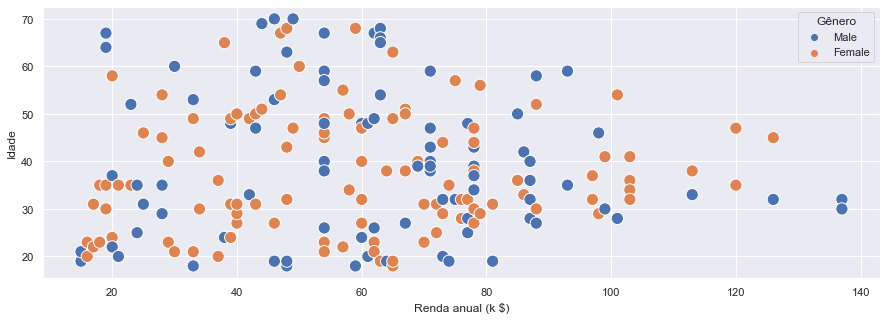

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=customers_df, x='Renda anual (k $)',
                y='Idade',  hue="Gênero",s=150,cmap='viridis')
plt.show()

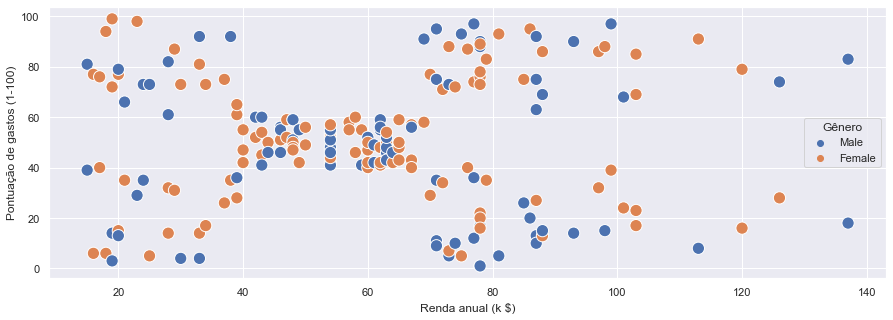

In [11]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=customers_df, x='Renda anual (k $)',
                y='Pontuação de gastos (1-100)', 
                hue="Gênero",s=150,cmap='viridis')
plt.show()

# Segmentação Utilizando K-means

In [12]:
X =customers_df[['Renda anual (k $)','Pontuação de gastos (1-100)']].values

## Definir o número de clusters que serão utilizados no K-means

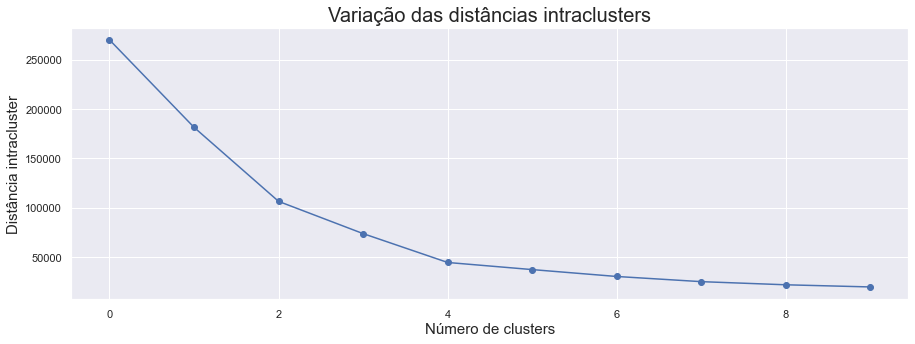

In [13]:
funcao_objetivo = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    funcao_objetivo.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))    
plt.plot(funcao_objetivo,'-o')
plt.title('Variação das distâncias intraclusters',size=20)
plt.ylabel('Distância intracluster',size=15)
plt.xlabel('Número de clusters',size=15)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

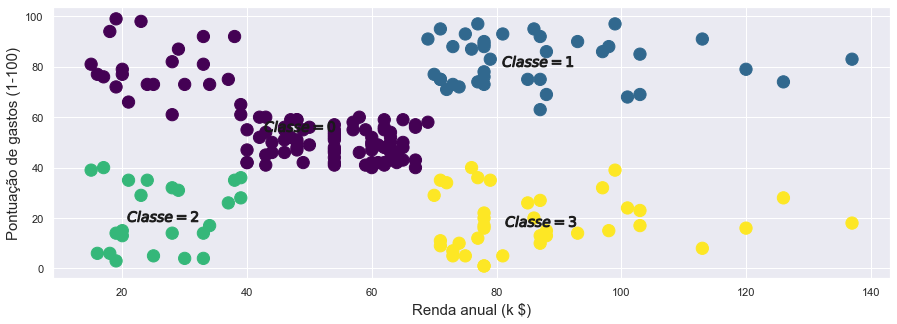

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=150, cmap='viridis')
plt.xlabel('Renda anual (k $)',size=15)
plt.ylabel('Pontuação de gastos (1-100)',size=15)

centers = kmeans.cluster_centers_

for i in range(centers.shape[0]):
    marker_s = '$Classe = ' + str(i) +'$'
    plt.scatter(centers[i, 0], centers[i, 1], c='k',marker= marker_s, s=5000);
plt.show()

## Criar uma nova coluna no dataset indicando a qual grupo o cliente pertence 

In [16]:
customers_df['Grupos'] = y_kmeans

In [17]:
customers_df.head()

,Gênero,Idade,Renda anual (k $),Pontuação de gastos (1-100),Grupos
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,2


## Alterar Male para 0 e Female para 1 na coluna gênero

In [18]:
codes, unique = pd.factorize(customers_df['Gênero'])
customers_df['Gênero'] = codes

In [19]:
customers_df

,Gênero,Idade,Renda anual (k $),Pontuação de gastos (1-100),Grupos
0,0,19,15,39,2
1,0,21,15,81,0
2,1,20,16,6,2
3,1,23,16,77,0
4,1,31,17,40,2
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,3
197,0,32,126,74,1
198,0,32,137,18,3


## Verificar a quantidade de clientes por grupo

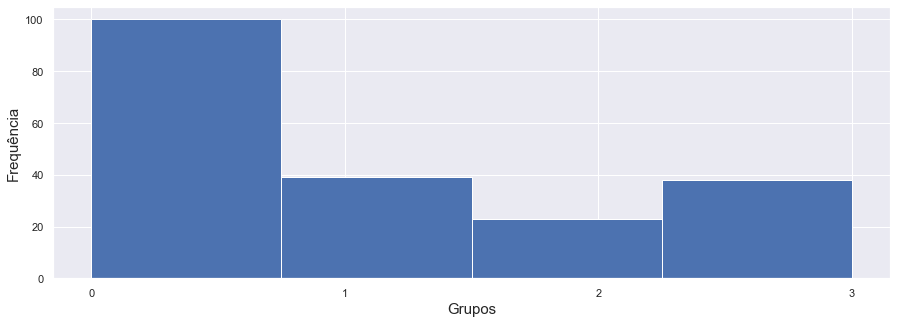

In [20]:
y = customers_df['Grupos'].values
del customers_df['Grupos']
X = customers_df.values

plt.figure(figsize=(15,5))
plt.hist(y, bins=4)
plt.xticks([0,1,2,3])
plt.xlabel('Grupos',size=15)
plt.ylabel('Frequência',size=15)
plt.show()

# Classificação Utilizando Árvore de Decisão

In [21]:
clf = tree.DecisionTreeClassifier()

folds = 10

acuracia = np.zeros((folds,1))

for i in range(folds):
    # Separa o dataset em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # Treina o modelo
    clf.fit(X_train, y_train)
    
    # Avalia a acurária do modelo 
    predict = clf.predict(X_test)
    acuracia[i] = accuracy_score(y_test, predict) * 100
    
print('Acuráia média:', acuracia.mean())
print('Desvio padrão:', acuracia.std())

Acuráia média: 97.0
Desvio padrão: 1.8708286933869707


## Plotar a matriz de confusão

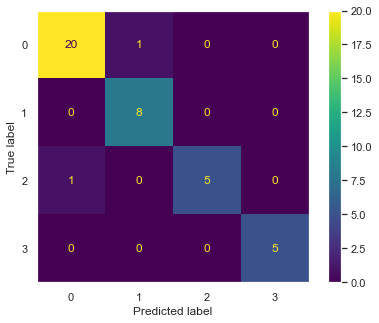

In [22]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.array(y_test),predict))
disp.plot(cmap="viridis", ax=ax1,);

## Visualizar a árvore de decisão final

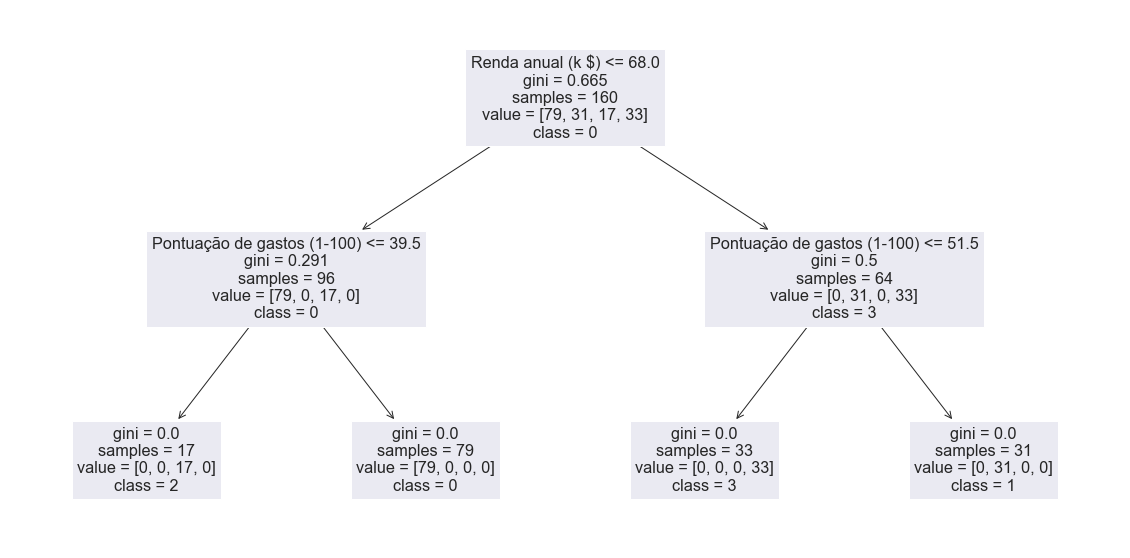

In [23]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=customers_df.columns,class_names=['0','1','2','3'],max_depth=5)
plt.show()